# Business Problem
As a marketing agency, Our Primary Objective is to maximize the return on investment (ROI) for Our Client's advertising compaigns. We have Conducted two ad compaigns one on facebook and the other on Adwards, and we need to determine which platform yields better than results in terms of clicks, Converisons, and overall cost-effectiveness. By idetifying the most effective platform, we can allocate our Resources more efficiency and optimize our Advertising stratgies to deliver beter outcomes for our clients.

# Research Question

#### which ad. platform is more effective in terms of conversion , clicks, and overall cost-effectiveness?
# Data Description 

The Dataset comprise a collection of data comparing the performance of two seprate ad. compaign conducted throghout the year 2021. Specially the data covers a facebook Ad. Compaign and an Adword . For each day of the year 2021 , there sis a corresponding row in dataset , resulting in a total of 365 lines of compaign data to analyze. The Dataset various performance metrics for each ad. compaign, providing insights into their effectiveness and efficiency over time.

key feature included in the dataset are as follows:

 * Date :  The data Corresponding to each row of compaign data,ranging from january 1st, 2021, to to December 31st, 2021.
 * Ad views :  The number of times the ad was viewed
 * Ad.Clicks :  The number of Clicks received on the ad.
 * Ad converisons :  The Number of Conversions resulting from the ad.
 * Cost per Ad :  The cost associated with runig the facebook ad Compaign.
 * Click- Through Rate (CTR) :  The Ratio of Clicks to views indicating the effectivness of the Ad. in generating Clicks.
 * Conversion Rate :  The Ratio of converisons to Clicks , reflecting the effectivness of the ad in driving desired actions.
 * Cost per Click (CPC) :  The average cost incurred per click on the ad.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pip install requests

In [3]:
Data = pd.read_csv('Capstone Dataset.xlsx - Capstone Dataset.csv')
df = Data.copy()

In [4]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2023,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30
1,1/2/2023,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2023,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2023,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2023,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40


In [5]:
df.shape

(365, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

In [7]:
df.isnull().sum()

Date                                               0
Facebook Ad Campaign                               0
Facebook Ad Views                                  0
Facebook Ad Clicks                                 0
Facebook Ad Conversions                            0
Cost per Facebook Ad                               0
Facebook Click-Through Rate (Clicks / View)        0
Facebook Conversion Rate (Conversions / Clicks)    0
Facebook Cost per Click (Ad Cost / Clicks)         0
AdWords Ad Campaign                                0
AdWords Ad Views                                   0
AdWords Ad Clicks                                  0
AdWords Ad Conversions                             0
Cost per AdWords Ad                                0
AdWords Click-Through Rate (Clicks / View)         0
AdWords Conversion Rate (Conversions / Click)      0
AdWords Cost per Click (Ad Cost / Clicks)          0
dtype: int64

In [8]:
df.describe()

,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
std,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106
min,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000


In [9]:
df['Date'] =  pd.to_datetime(df['Date'])

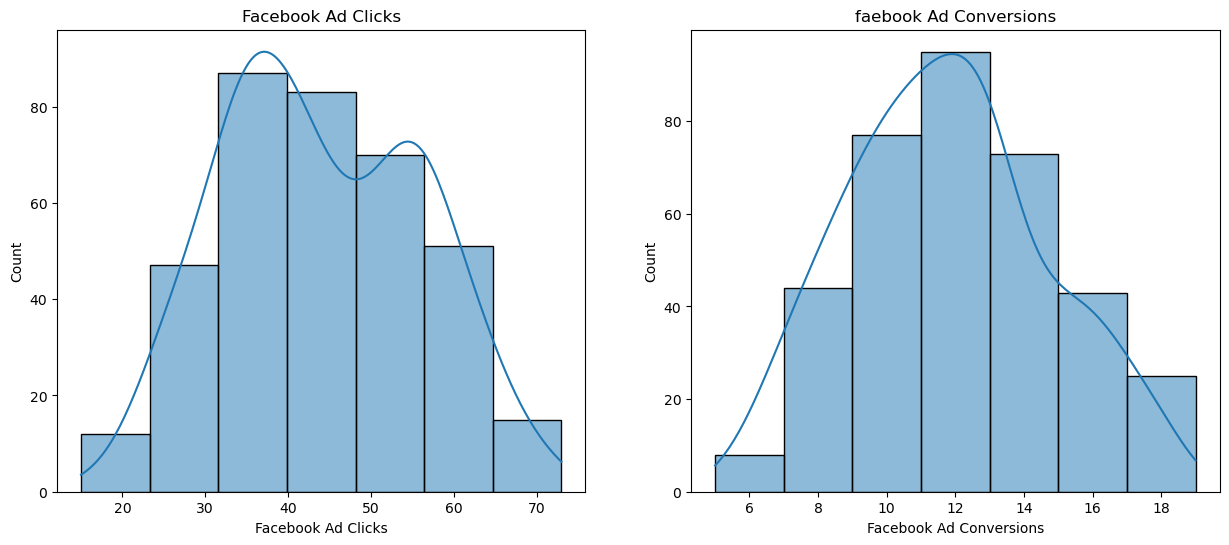

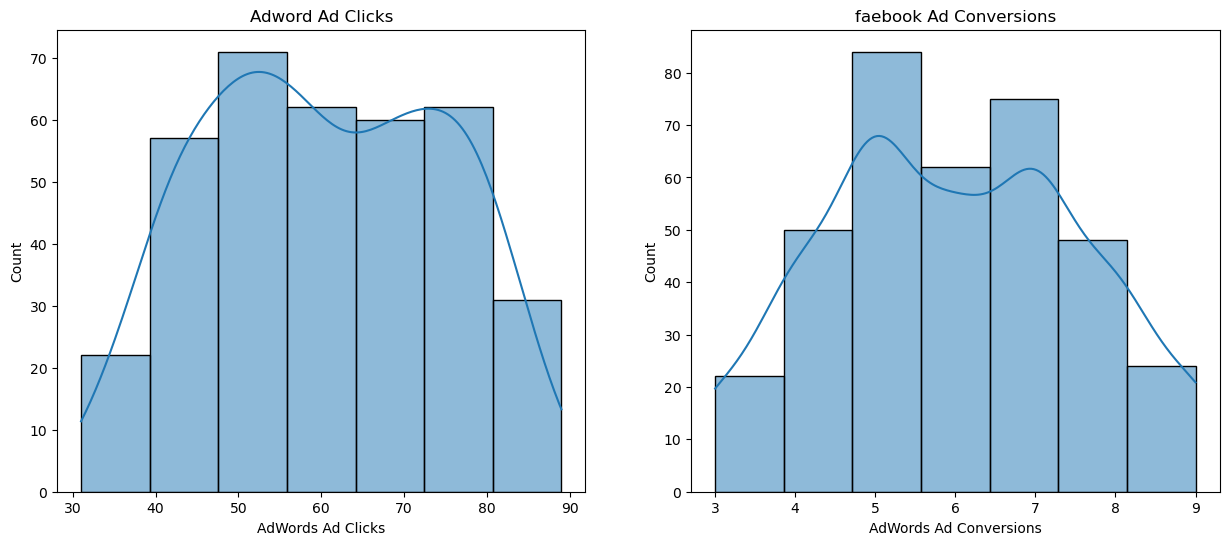

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'] , bins = 7 , edgecolor = 'k' , kde = True)
plt.subplot(1,2,2)
plt.title('faebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'],bins = 7 , edgecolor = 'k' , kde = True)
plt.show()


plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Adword Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'] , bins = 7 , edgecolor = 'k' , kde = True)
plt.subplot(1,2,2)
plt.title('faebook Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'],bins = 7 , edgecolor = 'k' , kde = True)
plt.show()

##### Normal Distributed and Symmetrical

### How Frequently do we observe days with high numbers of conversions compared to days with low number of converison

In [11]:
# creating function to calculate the categry for the converison
def conversion_category(converion_col):
    category = []
    for col in df[converion_col]:
        if col < 6:
            category.append('less than 6')
        elif 6<=col < 11:
            category.append('6 - 10')
        elif 11 <= col < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category
df['Facebook Coversion Category'] = conversion_category('Facebook Ad Conversions')
df['Adwords Coversion Category'] = conversion_category('AdWords Ad Conversions')

    

In [12]:
df[['Facebook Ad Conversions', 'Facebook Coversion Category' ,'AdWords Ad Conversions', 'Adwords Coversion Category']].head()

,Facebook Ad Conversions,Facebook Coversion Category,AdWords Ad Conversions,Adwords Coversion Category
0,8,6 - 10,5,less than 6
1,12,10 - 15,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10


In [13]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Coversion Category,Adwords Coversion Category
0,2023-01-01,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30,6 - 10,less than 6
1,2023-01-02,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05,10 - 15,6 - 10
2,2023-01-03,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23,6 - 10,less than 6
3,2023-01-04,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86,6 - 10,less than 6
4,2023-01-05,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40,6 - 10,6 - 10


In [14]:
df['Facebook Coversion Category'].value_counts()

Facebook Coversion Category
10 - 15         189
6 - 10          128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [15]:
facebook = pd.DataFrame(df['Facebook Coversion Category'].value_counts()).reset_index().rename(columns= {'Facebook Coversion Category':'Category'})

In [16]:
facebook

,Category,count
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [17]:
df['Adwords Coversion Category'].value_counts()

Adwords Coversion Category
6 - 10         209
less than 6    156
Name: count, dtype: int64

In [18]:
adwords = pd.DataFrame(df['Adwords Coversion Category'].value_counts()).reset_index().rename(columns= {'Adwords Coversion Category':'Category'})
# adwords

In [19]:
category_df = pd.merge(facebook , adwords , on = 'Category' , how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,more than 15,47,0.0
3,less than 6,1,156.0


In [20]:
category_df = category_df.iloc[[3,1,0,2]]
category_df

,Category,count_x,count_y
3,less than 6,1,156.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
2,more than 15,47,0.0


In [21]:
X_axis = np.arange(len(category_df))
X_axis

array([0, 1, 2, 3])

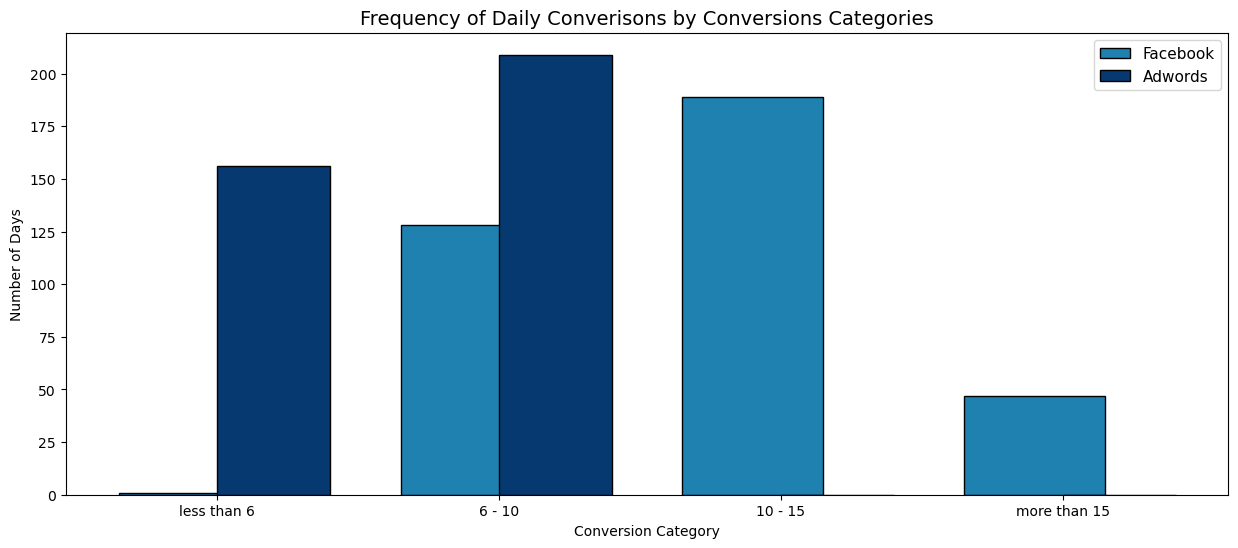

In [22]:
X_axis = np.arange(len(category_df))
plt.figure(figsize =(15,6))
plt.bar(X_axis - 0.1 , category_df['count_x'],0.5, label = 'Facebook' , color = '#1e81b0' , linewidth = 1 , edgecolor = 'k')
plt.bar(X_axis + 0.2 , category_df['count_y'],0.4, label = 'Adwords' , color = '#063970' , linewidth = 1 , edgecolor = 'k')

plt.xticks(X_axis , category_df['Category'])
plt.xlabel("Conversion Category")
plt.ylabel("Number of Days")
plt.title('Frequency of Daily Converisons by Conversions Categories' , fontsize = 14)
plt.legend(fontsize = 11)
plt.show()


In [23]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Coversion Category,Adwords Coversion Category
0,2023-01-01,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30,6 - 10,less than 6
1,2023-01-02,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05,10 - 15,6 - 10
2,2023-01-03,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23,6 - 10,less than 6
3,2023-01-04,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86,6 - 10,less than 6
4,2023-01-05,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40,6 - 10,6 - 10


* The data suggeste Facebok had more frequent higher converison days than AdWords , Which either had very low conversion rates (less than 6) or moderate ones (6-10)
* There is a significant variance in the number of high-conversion days between two differnet compaigns.


### Do more clicks on the ad really lead to more sales?

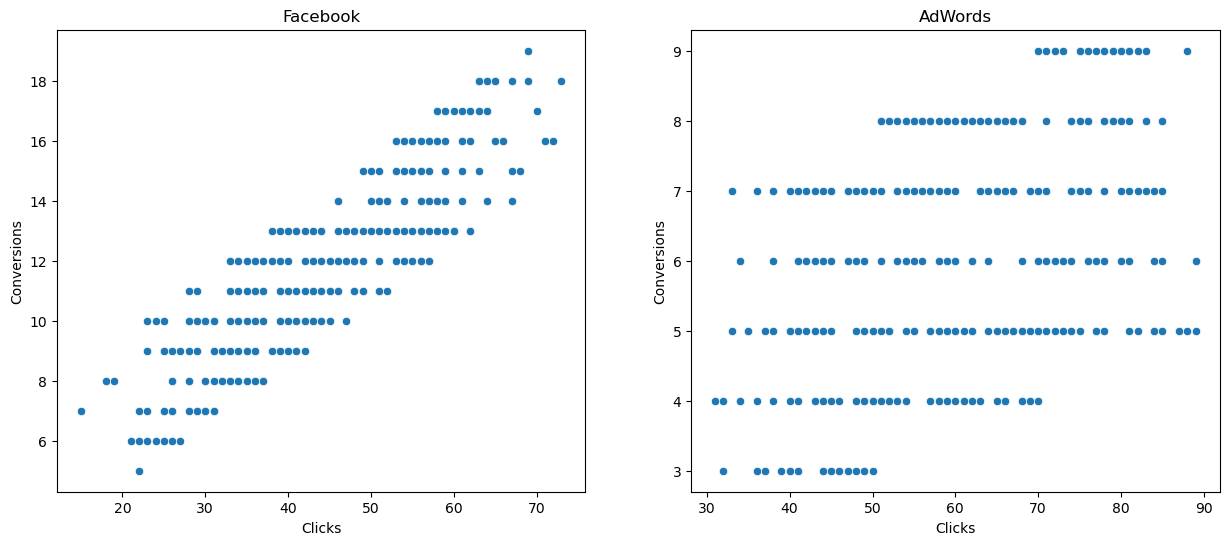

In [24]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x = df['Facebook Ad Clicks'] , y = df['Facebook Ad Conversions'])
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x = df['AdWords Ad Clicks'] , y = df['AdWords Ad Conversions'])
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()


In [25]:
facebook_corr = df[['Facebook Ad Conversions' , 'Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [26]:
AdWords_corr = df[['AdWords Ad Clicks', 'AdWords Ad Conversions']].corr()
AdWords_corr

,AdWords Ad Clicks,AdWords Ad Conversions
AdWords Ad Clicks,1.000000,0.447993
AdWords Ad Conversions,0.447993,1.000000


In [27]:
print('Correlation Coeff \n-----------------')
print('Facebook:', round(facebook_corr.values[0,1],2))
print('AdWords:', round(AdWords_corr.values[0,1],2))

Correlation Coeff 
-----------------
Facebook: 0.87
AdWords: 0.45


*   A correlation coefficient of 0.87 indicates positively relationship between Clicks on Facebook ads and sales . This Suggestes that as the number of Clicks on Facebook ads increase , sales trend to increase as well.

*   This strong correlation suggests that Facebook ads are highly effective in driving sales , as a large portion of the variation in sales can be explained by the variation in clicks on Facebook on ads.

*   The correlation between clicks on Facebook ads and sales suggests that Facebook advertising in highly effective in driving sales for the business. Increasing investment in Facebook ads or optimizing their Performance could Potentially lead to even higher sales
*   A correlation cofficient of 0.45 indicates a moderate positive linear relationship between clicks on AdWords ads and sales. While there is still a positive realtionship , it is not as with Facebook ads.

In [28]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Coversion Category,Adwords Coversion Category
0,2023-01-01,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30,6 - 10,less than 6
1,2023-01-02,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05,10 - 15,6 - 10
2,2023-01-03,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23,6 - 10,less than 6
3,2023-01-04,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86,6 - 10,less than 6
4,2023-01-05,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40,6 - 10,6 - 10


In [29]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Coversion Category,Adwords Coversion Category
0,2023-01-01,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30,6 - 10,less than 6
1,2023-01-02,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05,10 - 15,6 - 10
2,2023-01-03,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23,6 - 10,less than 6
3,2023-01-04,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86,6 - 10,less than 6
4,2023-01-05,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40,6 - 10,6 - 10


 # Hypothesis Testing



In [30]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Coversion Category,Adwords Coversion Category
0,2023-01-01,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30,6 - 10,less than 6
1,2023-01-02,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05,10 - 15,6 - 10
2,2023-01-03,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23,6 - 10,less than 6
3,2023-01-04,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86,6 - 10,less than 6
4,2023-01-05,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40,6 - 10,6 - 10


In [31]:
print('Mean Conversion\n --------------------')
print('Facebook :', round(df['Facebook Ad Conversions'].mean(),2))
print('Facebook :', round(df['AdWords Ad Conversions'].mean(),2))

t_stats , p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], b = df['AdWords Ad Conversions'],equal_var = False)
print('\nt statistic', t_stats, '\np-value', p_value)

if p_value < 0.05:
    print("\np-value is leass than significance vale , Reject  the null Hypothesis")
else:
    print("\np-value is greater than the significance value, Aceept the null hypothesis")

Mean Conversion
 --------------------
Facebook : 11.74
Facebook : 5.98

t statistic 32.88402060758184 
p-value 9.348918164530465e-134

p-value is leass than significance vale , Reject  the null Hypothesis


* The mean number of converisons from Facebook ads(11.74) is substantially higher than the mean number of converisons from AdWords ads (5.98). This Suggestes that, on avergae , Facebook advertising is more effective in generating converisons compared to AdWords advertising


# Regression Analysis

#### what will happen when I go with Facebook Ad? How many Facebook ads converisons can I expect given a certain number of facebook ads Clicks?

In [32]:
X = df[['Facebook Ad Clicks']]

Y = df[['Facebook Ad Conversions']]

reg_model =  LinearRegression()
reg_model.fit(X,Y)
prediction = reg_model.predict(X)

r2 = r2_score(Y , prediction)*100
mse = mean_squared_error(Y, prediction)
print('Accuracy (R2 score):', round(r2,2),'%')
print('Mean Squared Error:', round(mse,2))

Accuracy (R2 score): 76.35 %
Mean Squared Error: 2.02


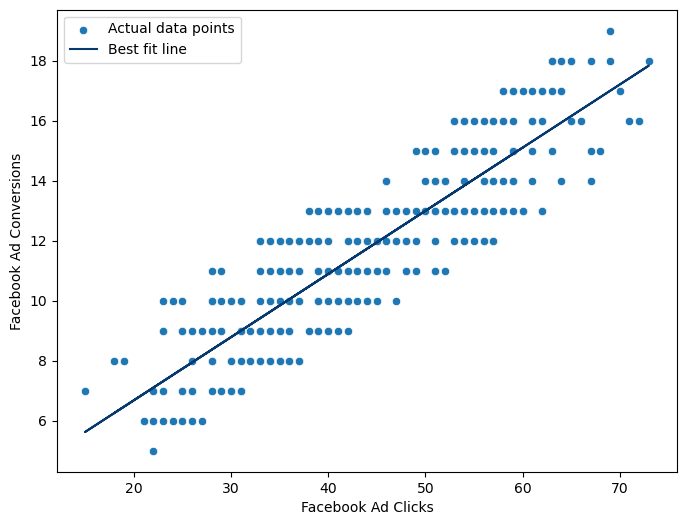

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'], y = df['Facebook Ad Conversions'], label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'] , prediction , color = '#063970' , label = 'Best fit line' )
plt.legend()
plt.show()

In [34]:
print(f'For {50} Clicks, Expected Converisons : {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} Clicks, Expected Converisons : {round(reg_model.predict([[80]])[0][0],2)}')

For 50 Clicks, Expected Converisons : 13.0
For 80 Clicks, Expected Converisons : 19.31


* The model has a reasonably god predictive power, with an R2 score of 76.35%.This Suggestesthat it can effectively predict Facebook ad conversions based on the numbe rof Facebook ad clicks

* With the insights provided by the Linear Regression model, Businesses can make informed decisions about resources allocation, budeget planning , and campaign Optimization

In [35]:
df.head(2)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Coversion Category,Adwords Coversion Category
0,2023-01-01,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30,6 - 10,less than 6
1,2023-01-02,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05,10 - 15,6 - 10


# Analyzing Facebook Campaign metrics over Time

In [36]:
# cleaning Data
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))



In [37]:
df.head(2)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Coversion Category,Adwords Coversion Category
0,2023-01-01,FB_Jan,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30,6 - 10,less than 6
1,2023-01-02,FB_Jan,3106,36,12,104.0,1.15,34.04,2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05,10 - 15,6 - 10


In [38]:
# Filtering
df = df[['Date', 'Facebook Ad Views',
         'Facebook Ad Clicks', 'Facebook Ad Conversions',
         'Cost per Facebook Ad', 'Facebook Click-Through Rate (Clicks / View)', 
         'Facebook Conversion Rate (Conversions / Clicks)', 
         'Facebook Cost per Click (Ad Cost / Clicks)'
         
        ]]
df.head(2)

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2023-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2023-01-02,3106,36,12,104.0,1.15,34.04,2.91


# At what times of the Month or days of the week do we obserce the conversions?

In [39]:
# extracting months and week day from the date columns
df['month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.weekday

In [40]:
df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),month,Week
0,2023-01-01,2116,18,8,126.0,0.83,42.73,7.14,1,6
1,2023-01-02,3106,36,12,104.0,1.15,34.04,2.91,1,0
2,2023-01-03,3105,26,8,102.0,0.84,31.45,3.89,1,1
3,2023-01-04,1107,27,9,71.0,2.45,34.76,2.62,1,2
4,2023-01-05,1317,15,7,78.0,1.10,47.59,5.38,1,3


In [41]:
df.groupby('Week')[['Facebook Ad Views']].sum()

,Facebook Ad Views
Week,
0,109510
1,114342
2,110703
3,114313
4,111380
5,118268
6,117070


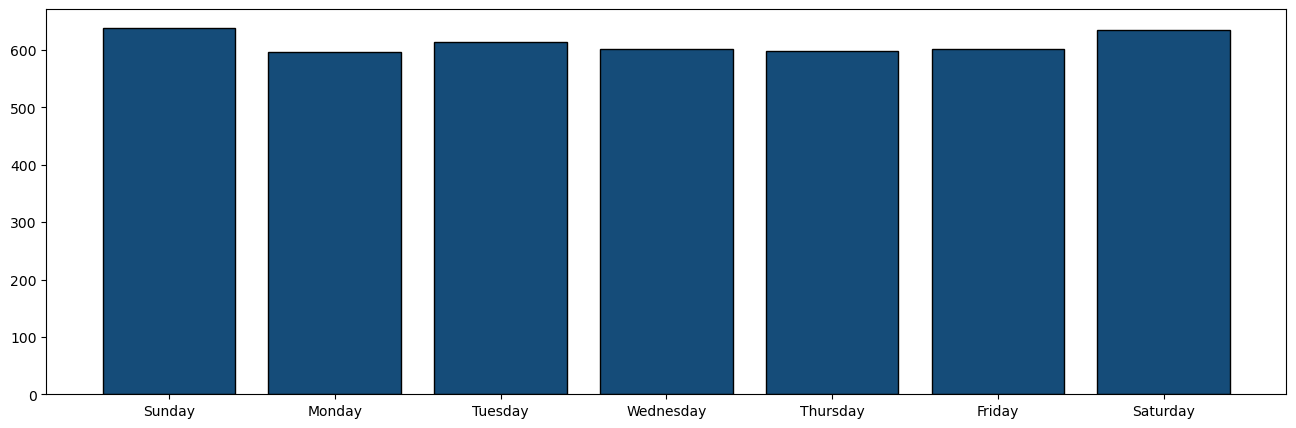

In [56]:
plt.figure(figsize=(16,5))
weekly_conversion = df.groupby('Week')[['Facebook Ad Conversions']].sum()
week_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color = '#154c79',edgecolor = 'k')
# for i in range( 0, len(week_names)):
#     plt.annotate(xy = (i, weekly_conversion[i]), text = weekly_conversion[i],
#                  horizontalalignment= 'center', color = 'black')
plt.show()

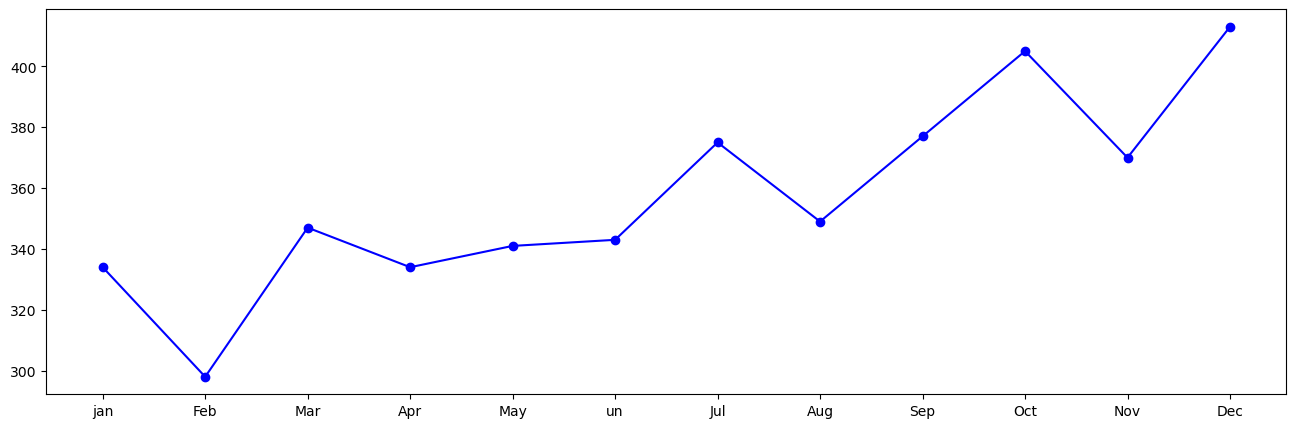

In [60]:
plt.figure(figsize =(16,5))
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names =['jan', 'Feb', 'Mar', 'Apr','May', 'un','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'], '-o', color = 'Blue')